# Exploration

The dataset "with_sentiment.csv" contains 36.343 tweets that contain the word ING. Sentiment is added by using the "RobBERT finetuned for sentiment analysis on DBRD model"(1) from the KULeuven. 

### Goal
Our team processes huge amounts of textual data, e.g. email routing, complaints in app and in MijnING. We want to get more insights in that data. What do our customers want to be improved? And what is their opinion about what ING does?

(1) https://huggingface.co/DTAI-KULeuven/robbert-v2-dutch-sentiment

In [6]:
import pandas as pd
import os
import spacy
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(os.path.join("data","with_sentiment.csv"), index_col=0)

In [8]:
df.head()

,User,Date Created,Number of Likes,Source of Tweet,Tweet,negative,positive
49952,Gaby93Gaby,2021-06-01 06:06:21+00:00,0,Twitter for Android,@OnsOranje @ingnl @Rijkswaterstaat @GemeenteEd...,0.000441,0.999559
49951,ingnl,2021-06-01 06:07:16+00:00,1,Coosto,@stephanbackus @knab_nl @INGnl_OS @Rabobank Sp...,0.000397,0.999602
49949,Grippie13,2021-06-01 06:27:12+00:00,0,Twitter for iPhone,@ingnl elke morgen jullie irritante reclame op...,0.996405,0.003595
49948,Grippie13,2021-06-01 06:32:16+00:00,0,Twitter for iPhone,@ingnl En beleggen is verschrikkelijk riskant....,0.998612,0.001388
49947,edwinijsman,2021-06-01 09:00:17+00:00,0,Twidere for Android,@PolitiekDelftnl @PPDelft @ingnl Het wachtwoor...,0.001508,0.998492


In [9]:
df["Date Created"] = pd.to_datetime(df["Date Created"])
df = df.sort_values("Date Created")

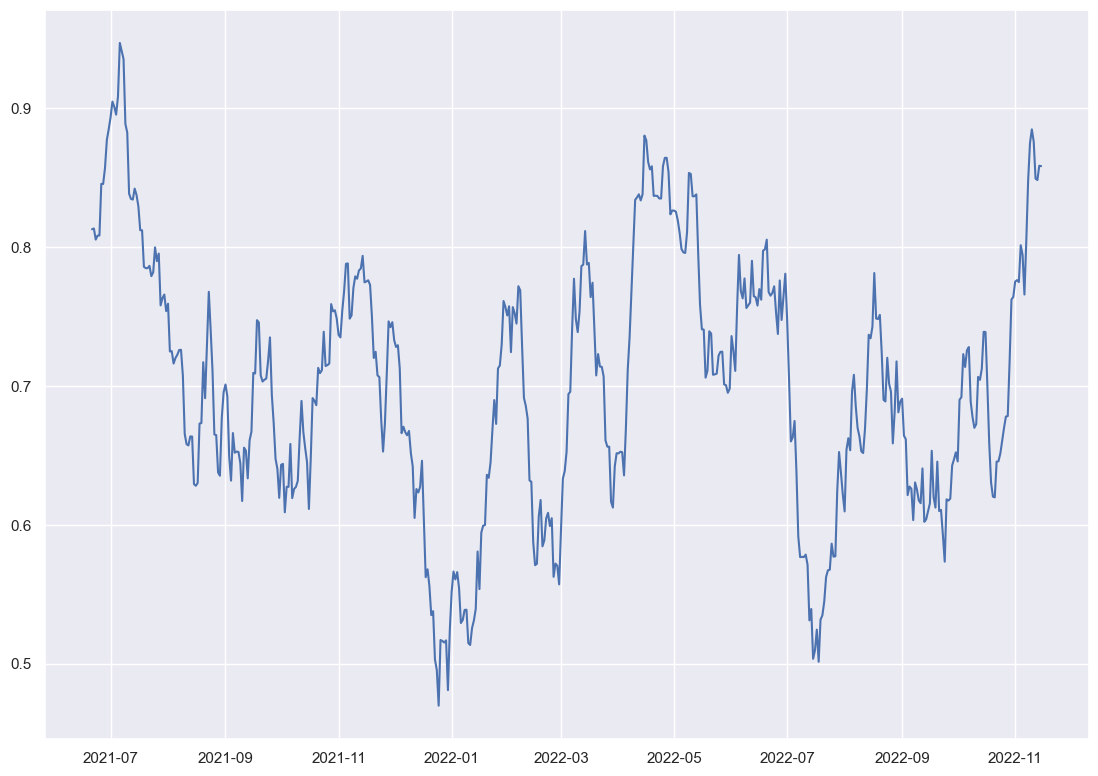

In [10]:
plt.figure(figsize=(12, 9))
plt.style.use('fivethirtyeight')
sns.set()
print(plt.plot(df.groupby(pd.Grouper(key='Date Created',freq='D'))["positive"].median().rolling(21).mean()))